# Exploring the UTx000 Extension Beacon  and REDCap Data
(See [GH repo](https://github.com/intelligent-environments-lab/utx000))

# Summary
This notebook helps look at the measurements taken during the study period for the various sensors on the beacons cross-referenced with some aspects of the participants given in the REDCap Environment and Experiences Survey.

In [86]:
import warnings
warnings.filterwarnings('ignore')

# Package Import

In [87]:
import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib.colors import LogNorm, ListedColormap, LinearSegmentedColormap

import seaborn as sns

from joypy import joyplot

# Data Import

## BEVO Beacon
Environmental measurements are kept in the latest beacon file.

In [88]:
beacon = pd.read_csv('../data/processed/beacon-ux_s20.csv',dtype={"beacon":"Int64","redcap":"Int64","fitbit":"Int64"},index_col=0,parse_dates=True)
beacon.head()

,tvoc,lux,no2,co,co2,pm1_number,pm2p5_number,pm10_number,pm1_mass,pm2p5_mass,pm10_mass,temperature_c,rh,beacon,beiwe,fitbit,redcap
timestamp,,,,,,,,,,,,,,,,,
2020-06-08 13:00:00,81.2,2.77440,0.775262,13.9663,NaN,11.900343,11.320369,11.075540,0.733881,1.149634,1.935875,27.5,47.00,1,kyj367pi,24,10
2020-06-08 13:02:00,82.8,2.77440,0.798162,13.9555,NaN,12.730011,12.184753,11.910685,0.800211,1.198782,1.979986,27.5,47.00,1,kyj367pi,24,10
2020-06-08 13:04:00,84.2,2.77440,0.770355,13.8341,NaN,13.183286,12.706129,12.422126,0.840419,1.234695,2.013414,27.5,47.00,1,kyj367pi,24,10
2020-06-08 13:06:00,82.0,2.77440,0.780169,14.0344,NaN,12.301532,11.367415,11.062862,0.735991,1.104990,1.886775,27.5,47.00,1,kyj367pi,24,10
2020-06-08 13:08:00,86.6,4.07184,0.781805,13.7661,NaN,12.932402,11.947330,11.611038,0.780179,1.128095,1.905629,27.5,47.05,1,kyj367pi,24,10


## REDCap
We can import the processed EE survey data

In [89]:
ee = pd.read_csv('../data/processed/redcap-ee_survey-ux_s20.csv',dtype={"beacon":"Int64","redcap":"Int64","fitbit":"Int64"})
ee.describe()

,change_temperature,fresh_air,both,other_window_use,no_window_use,stagnant,smelly,earthy,moldy,cooking,fragrant,well_ventilated,obnoxious,other_smell,no_smell,bleach,ammonia,pinesol,vinegar,alcohol,disinfectant_wipes,soap_and_water,floor_cleaners,no_cleaners,redcap,beacon,fitbit
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.000000,55.000000,55.000000,55.0,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,27.000000,47.000000
mean,0.036364,0.309091,0.127273,0.036364,0.581818,0.272727,0.036364,0.054545,0.0,0.327273,0.036364,0.600000,0.0,0.054545,0.0,0.454545,0.036364,0.072727,0.145455,0.181818,0.636364,0.690909,0.400000,0.090909,39.145455,24.592593,33.574468
std,0.188919,0.466378,0.336350,0.188919,0.497807,0.449467,0.188919,0.229184,0.0,0.473542,0.188919,0.494413,0.0,0.229184,0.0,0.502519,0.188919,0.262082,0.355808,0.389249,0.485479,0.466378,0.494413,0.290129,21.307639,12.965218,16.486812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.500000,15.500000,23.500000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,38.000000,24.000000,35.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,55.500000,33.000000,46.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,48.000000,64.000000


## Merged Datasets
Now we add the EE survey data to the beacon data based on the various ID columns.

In [90]:
env = beacon.merge(right=ee,on=["beiwe","redcap","beacon","fitbit"],how="left").dropna(subset=["building_type"])
env.head()

,tvoc,lux,no2,co,co2,pm1_number,pm2p5_number,pm10_number,pm1_mass,pm2p5_mass,pm10_mass,temperature_c,rh,beacon,beiwe,fitbit,redcap,building_type,change_temperature,fresh_air,both,other_window_use,no_window_use,stagnant,smelly,earthy,moldy,cooking,fragrant,well_ventilated,obnoxious,other_smell,no_smell,allergy_intensity,bleach,ammonia,pinesol,vinegar,alcohol,disinfectant_wipes,soap_and_water,floor_cleaners,no_cleaners,cleaner_locations
0,81.2,2.77440,0.775262,13.9663,NaN,11.900343,11.320369,11.075540,0.733881,1.149634,1.935875,27.5,47.00,1,kyj367pi,24,10,apartment,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,same,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,"{'bleach': ['Bathroom'], 'ammonia': [], 'pines..."
1,82.8,2.77440,0.798162,13.9555,NaN,12.730011,12.184753,11.910685,0.800211,1.198782,1.979986,27.5,47.00,1,kyj367pi,24,10,apartment,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,same,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,"{'bleach': ['Bathroom'], 'ammonia': [], 'pines..."
2,84.2,2.77440,0.770355,13.8341,NaN,13.183286,12.706129,12.422126,0.840419,1.234695,2.013414,27.5,47.00,1,kyj367pi,24,10,apartment,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,same,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,"{'bleach': ['Bathroom'], 'ammonia': [], 'pines..."
3,82.0,2.77440,0.780169,14.0344,NaN,12.301532,11.367415,11.062862,0.735991,1.104990,1.886775,27.5,47.00,1,kyj367pi,24,10,apartment,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,same,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,"{'bleach': ['Bathroom'], 'ammonia': [], 'pines..."
4,86.6,4.07184,0.781805,13.7661,NaN,12.932402,11.947330,11.611038,0.780179,1.128095,1.905629,27.5,47.05,1,kyj367pi,24,10,apartment,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,same,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,"{'bleach': ['Bathroom'], 'ammonia': [], 'pines..."


### Summary of Data Available
We can take a quick look at the available data.

In [91]:
print(f"Dataset includes {len(env)} datapoints from {len(env['beiwe'].unique())} participants")

Dataset includes 929937 datapoints from 21 participants


# Base Analysis
Here we look at the raw, unaltered data in order to understand relationships between environment traits and the IEQ profiles, namely the pollutants. 

In [92]:
def plot_joyplot(df, features, target, feature_label, xmax=0, save=False):
    """
    Plots a joyplot of the distribution of the target variable for the given features.
    """
    df_expanded = df.melt(id_vars=target,value_vars=features,var_name="feature",value_name='represented')
    df_expanded = df_expanded[(df_expanded["represented"] > 0) & df_expanded[target] > 0]
    labels = []
    df_expanded.sort_values(by="feature",inplace=True)
    for f in df_expanded["feature"].unique():
        temp = df[df[f] == 1]
        labels.append(f"{f.replace('_',' ').title()} - {len(temp)}")
    
    fig, ax = joyplot(data=df_expanded,by="feature",column=target,
                kind='kde',overlap=1,ylim='own',alpha=0.75,colormap=cm.Blues_r,figsize=(12,6),labels=labels)
        
    if xmax != 0:
        for a in ax:
            a.set_xlim(right=xmax)
    
    if save:
        plt.savefig(f"../reports/figures/beacon_redcap/redcap-beacon_{feature_label}-{target}_joyplot.png",bbox_to_inches="tight")

    plt.show()
    plt.close()
    
    return df_expanded

## Cleaner Use and TVOCs
Many of the cleaners should emit TVOCs meaning that we can see how concentrations differ amongst groups who use cleaners to those who don't and see if these concentrations alter sleep metrics.

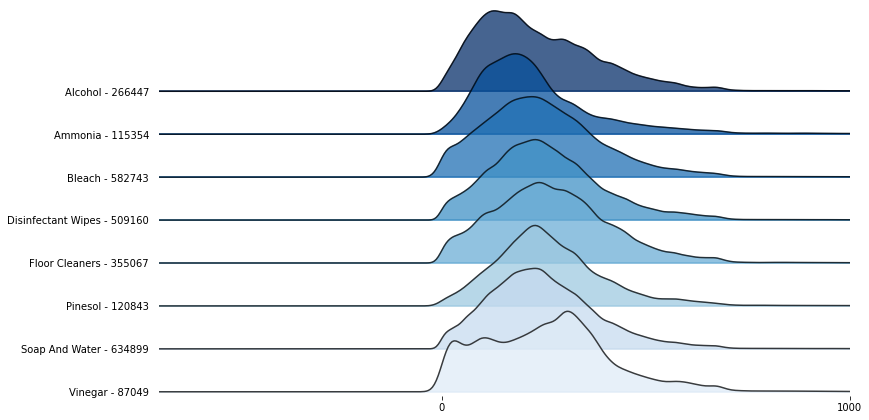

In [93]:
cleaners = ["bleach","ammonia","pinesol","vinegar","alcohol","disinfectant_wipes","soap_and_water","floor_cleaners","no_cleaners"]
env_cleaners = plot_joyplot(env, cleaners, "tvoc", "cleaner_use", xmax=1000, save=True)

<div class="alert alert-block alert-success">
    
Those that reported using `alcohol` to clean their surfaces did see a slight increase in the `tvoc` concentrations which makes sense since the TVOC sensors are very sensitive to ethanol.
    
</div>

## Window Use and CO2
There should be a relationship between the pollution profiles (CO$_2$ as proxy) and the window use.

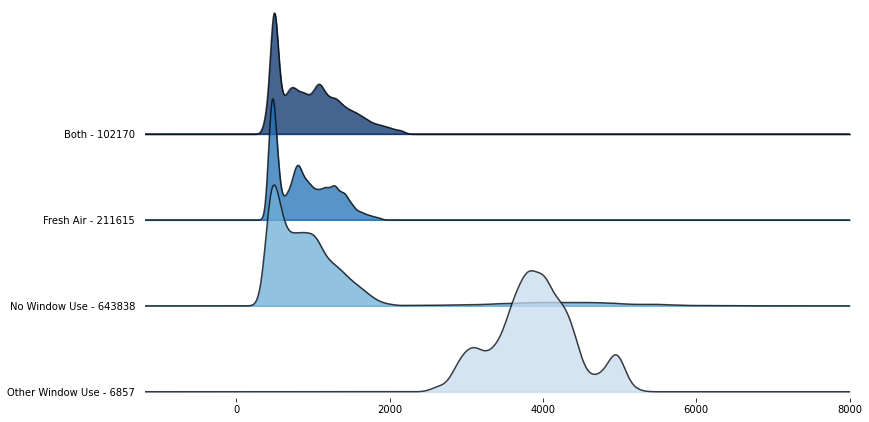

In [94]:
window_uses = ["change_temperature","fresh_air","both","other_window_use","no_window_use"]
env_window = plot_joyplot(env, window_uses, "co2", "window_use", xmax=8000, save=True)

<div class="alert alert-block alert-success">
    
There does seem to be a small relationship between `fresh_air` and `co2`, primarily with the second mode at what looks like 1000 ppm. 
    
</div>

## Smell and Pollution Profiles
`smell` could mean anything so we should check against more than just the CO$_2$ concentrations since a certain smell could be associated with PM. We will check against:
* CO$_2$
* PM
* TVOCs

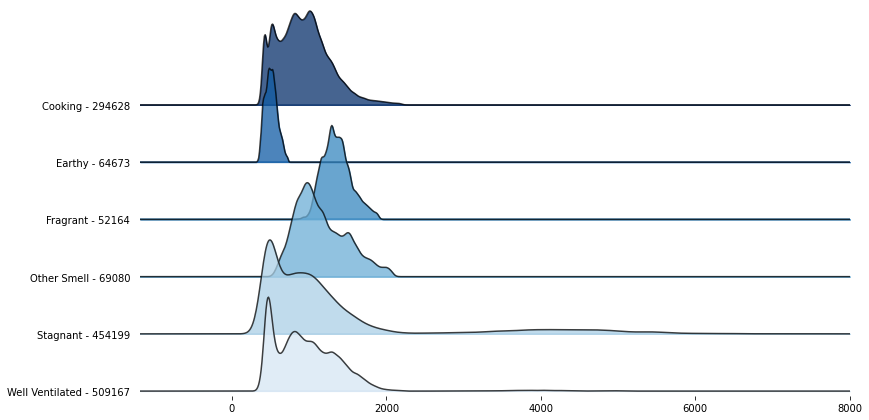

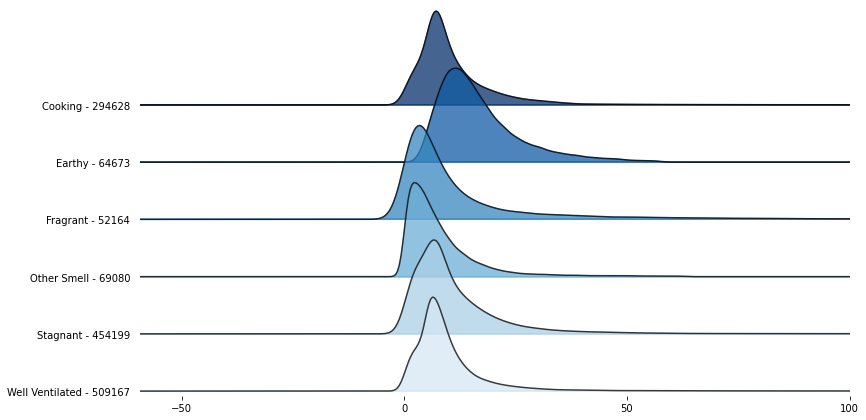

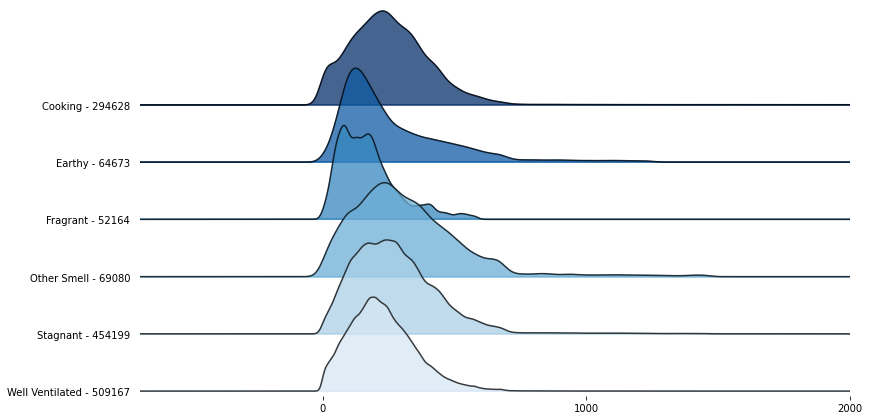

In [95]:
smells = ['stagnant', 'smelly', 'earthy', 'moldy', 'cooking', 'fragrant', 'well_ventilated', 'obnoxious', 'other_smell', 'no_smell']
env_co2 = plot_joyplot(env, smells, "co2", "smell", xmax=8000, save=True)
env_pm2p5_number = plot_joyplot(env, smells, "pm2p5_number", "smell", xmax=100, save=True)
env_tvoc = plot_joyplot(env, smells, "tvoc", "smell", xmax=2000, save=True)

<div class="alert alert-block alert-success">
    
There appear to be two relationships apparent from the joyplot: (1) a `stagnant` smell and `co2` and (2) a `well-ventilated` smell and `co2`. for the respondents who reported a `stagnant` smell, there are elevated concentrations near 4000 ppm whereas for individuals who said their apartment was `well_ventilated` it looks like more of their concentrations are centered around the 400 ppm concentration. 
    
</div>